Pairwise comparison data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Load the dataset
file_path = 'Shigella_ABQ_221_masked_full_beast_09282024_SNPs.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Rename columns for clarity
data.columns = ['Sample1', 'Sample2', 'SNP_Count']

data.head()


,Sample1,Sample2,SNP_Count
0,SRR14118839_Human_LA_2021,SRR14752273_Human_NM_2021,24
1,SRR14118839_Human_LA_2021,SRR14760173_Human_NM_2021,24
2,SRR14118839_Human_LA_2021,SRR14993601_Human_NM_2021,25
3,SRR14118839_Human_LA_2021,SRR14994818_Human_NM_2021,25
4,SRR14118839_Human_LA_2021,SRR15060909_Human_NM_2021,25


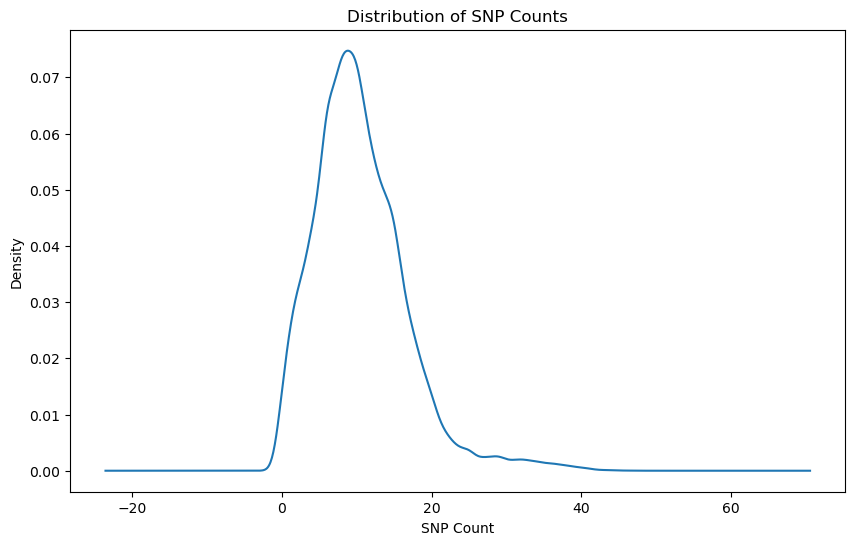

In [3]:
# Plot the distribution of SNP counts as kde
plt.figure(figsize=(10, 6))
data['SNP_Count'].plot.kde()
plt.title('Distribution of SNP Counts')
plt.xlabel('SNP Count')
plt.ylabel('Density')
plt.show()


In [4]:
# Extract only samples from NM
nm_samples = data[data['Sample1'].str.contains('NM') & data['Sample2'].str.contains('NM')]
nm_samples.head()

,Sample1,Sample2,SNP_Count
438,SRR14752273_Human_NM_2021,SRR14760173_Human_NM_2021,1
439,SRR14752273_Human_NM_2021,SRR14993601_Human_NM_2021,4
440,SRR14752273_Human_NM_2021,SRR14994818_Human_NM_2021,5
441,SRR14752273_Human_NM_2021,SRR15060909_Human_NM_2021,5
442,SRR14752273_Human_NM_2021,SRR15103314_Human_NM_2021,3


In [ ]:
# Extract years from isolate names based on the format SRR14752273_Human_NM_2021
nm_samples['Year1'] = nm_samples['Sample1'].str.split('_').str[3]
nm_samples['Year2'] = nm_samples['Sample2'].str.split('_').str[3]

nm_samples.head()

/var/folders/hj/hxnrh0pj6jg_2pwg6_qp53z40000gn/T/ipykernel_67047/2267246262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm_samples['Year1'] = nm_samples['Sample1'].str.split('_').str[3]
/var/folders/hj/hxnrh0pj6jg_2pwg6_qp53z40000gn/T/ipykernel_67047/2267246262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm_samples['Year2'] = nm_samples['Sample2'].str.split('_').str[3]


,Sample1,Sample2,SNP_Count,Year1,Year2
438,SRR14752273_Human_NM_2021,SRR14760173_Human_NM_2021,1,2021,2021
439,SRR14752273_Human_NM_2021,SRR14993601_Human_NM_2021,4,2021,2021
440,SRR14752273_Human_NM_2021,SRR14994818_Human_NM_2021,5,2021,2021
441,SRR14752273_Human_NM_2021,SRR15060909_Human_NM_2021,5,2021,2021
442,SRR14752273_Human_NM_2021,SRR15103314_Human_NM_2021,3,2021,2021


/var/folders/hj/hxnrh0pj6jg_2pwg6_qp53z40000gn/T/ipykernel_67047/2981893404.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


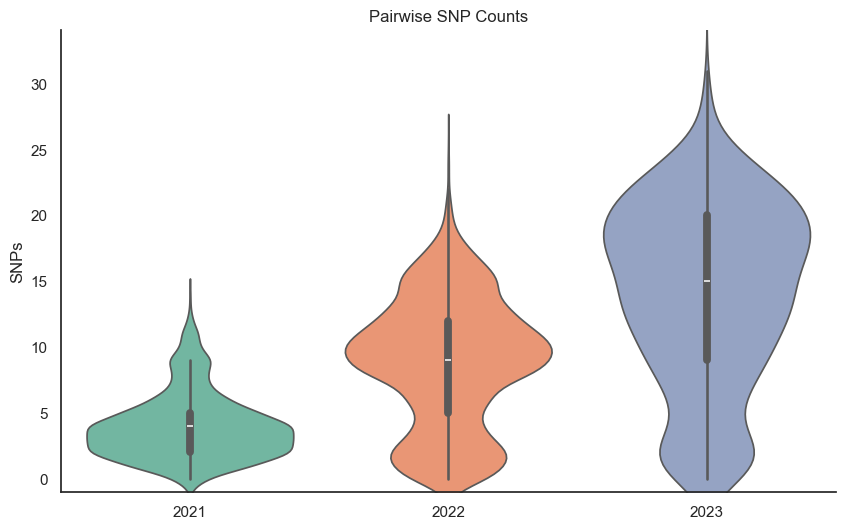

In [33]:
# Filter nm_samples where both samples' years are the same
nm_samples_same_year = nm_samples[nm_samples['Year1'] == nm_samples['Year2']]

# Plot the year to year comparison of SNP counts as a violin plot with different colors for each year
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year1', y='SNP_Count', data=nm_samples_same_year, hue='Year1', palette='Set2')
plt.title('Pairwise SNP Counts')
plt.xlabel('')
plt.ylabel('SNPs')
plt.legend(title='Year')

# Remove legend
plt.legend([],[], frameon=False)

sns.despine()
# Set y-axis limits with padding
ymax = nm_samples_same_year['SNP_Count'].max()
plt.ylim(-1, ymax * 1.1)  # Add 10% padding to the top

plt.show()

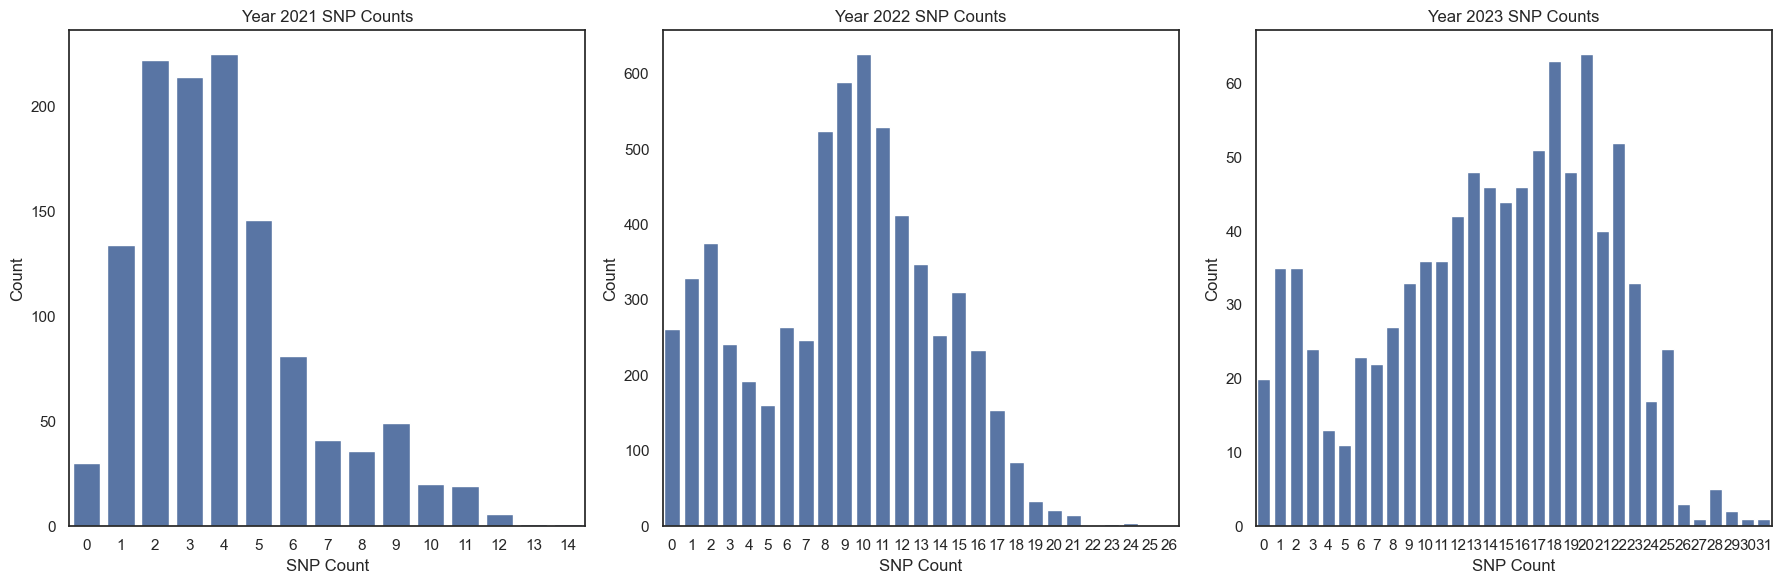

In [24]:
# Create same plot but histogram instead of violin plot
years = nm_samples_same_year['Year1'].unique()
plt.figure(figsize=(18, 6))

for i, year in enumerate(years):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=nm_samples_same_year[nm_samples_same_year['Year1'] == year], x='SNP_Count')
    plt.title(f'Year {year} SNP Counts')
    plt.xlabel('SNP Count')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



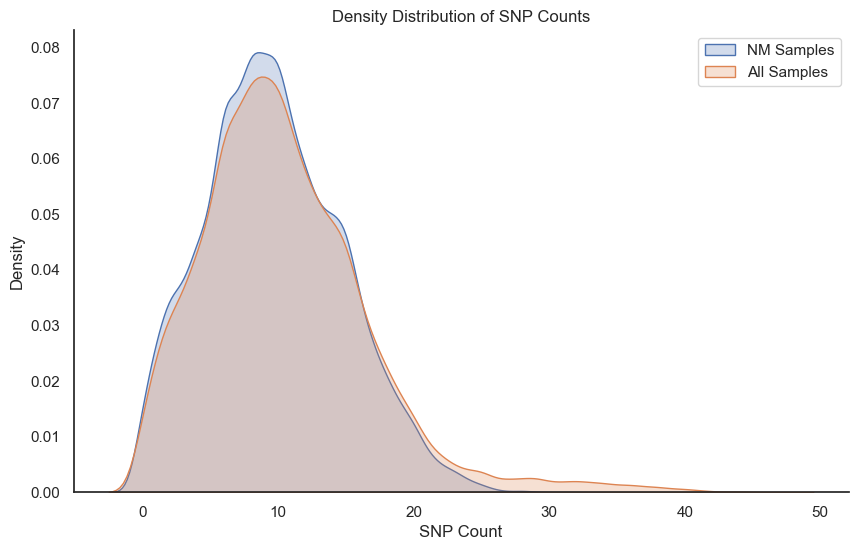

In [37]:
# Plot the density distribution of SNP counts for all NM samples vs all samples
plt.figure(figsize=(10, 6))
sns.kdeplot(data=nm_samples, x='SNP_Count', label='NM Samples', fill=True)
sns.kdeplot(data=data, x='SNP_Count', label='All Samples', fill=True)
plt.title('Density Distribution of SNP Counts')
plt.xlabel('SNP Count')
plt.ylabel('Density')
sns.despine()
plt.legend()
plt.show()

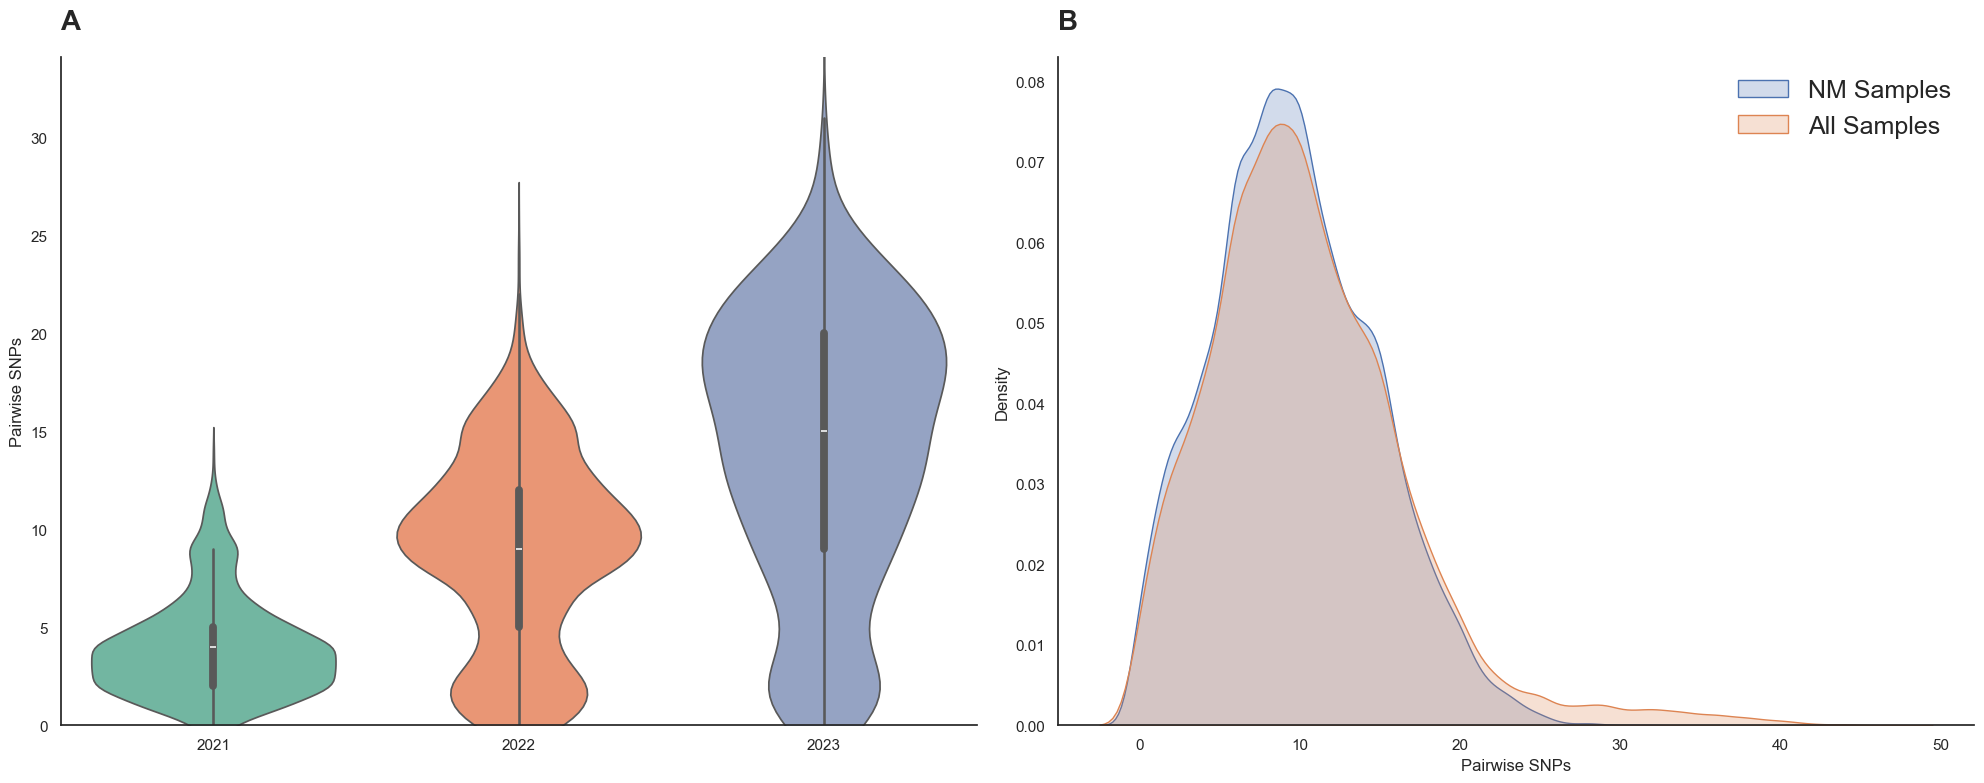

In [51]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot A: Violin plot
sns.violinplot(x='Year1', y='SNP_Count', data=nm_samples_same_year, 
               hue='Year1', palette='Set2', ax=ax1)
ax1.set_title('A', loc='left', fontweight='bold', pad=20, size=20)
ax1.set_xlabel('')
ax1.set_ylabel('Pairwise SNPs')
ax1.legend([], [], frameon=False)
sns.despine(ax=ax1)
ymax = nm_samples_same_year['SNP_Count'].max()
ax1.set_ylim(0, ymax * 1.1)

# Plot B: Density plot
sns.kdeplot(data=nm_samples, x='SNP_Count', label='NM Samples', 
            fill=True, ax=ax2)
sns.kdeplot(data=data, x='SNP_Count', label='All Samples', 
            fill=True, ax=ax2)
ax2.set_title('B', loc='left', fontweight='bold', pad=20, size=20)
ax2.set_xlabel('Pairwise SNPs')
ax2.set_ylabel('Density')
sns.despine(ax=ax2)
ax2.legend(frameon=False, fontsize=18)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Pairwise_comparisons_updated.pdf')

plt.show()

In [53]:
# Get general stats for the SNP counts
data['SNP_Count'].describe()

count    24309.000000
mean        10.474557
std          6.244094
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         47.000000
Name: SNP_Count, dtype: float64

In [56]:
# Get stats for NM samples
nm_samples['SNP_Count'].describe()

# What is the IQR for NM samples?
q1 = nm_samples['SNP_Count'].quantile(0.25)
q3 = nm_samples['SNP_Count'].quantile(0.75)
print(f'IQR for NM samples: {q1,q3}')

IQR for NM samples: (6.0, 13.0)


In [57]:
# Get the stats per year for NM samples
nm_samples.groupby('Year1')['SNP_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Year1,,,,,,,,
2021,9025.0,7.804321,3.612589,0.0,5.0,8.0,10.0,23.0
2022,11144.0,10.783920,5.289973,0.0,7.0,11.0,15.0,32.0
2023,946.0,14.081395,6.959196,0.0,9.0,15.0,20.0,31.0


In [52]:
# Extract the highest SNP count for each year and return the sample names
max_snps = nm_samples_same_year.groupby('Year1')['SNP_Count'].idxmax()
nm_samples_same_year.loc[max_snps, ['Sample1', 'Sample2', 'SNP_Count']]


,Sample1,Sample2,SNP_Count
8736,SRR17240352_Human_NM_2021,SRR17335833_Human_NM_2021,14
15456,SRR21091679_Human_NM_2022,SRR22363315_Human_NM_2022,26
24084,SRR26617664_Human_NM_2023,SRR26901217_Human_NM_2023,31


In [13]:
# Extract the lowest SNP count for each year and return the sample names
min_snps = nm_samples_same_year.groupby('Year1')['SNP_Count'].idxmin()
nm_samples_same_year.loc[min_snps, ['Sample1', 'Sample2', 'SNP_Count']]



,Sample1,Sample2,SNP_Count
2989,SRR15986993_Human_NM_2021,SRR16089430_Human_NM_2021,0
10800,SRR17838874_Human_NM_2022,SRR20649173_Human_NM_2022,0
23366,SRR23929212_Human_NM_2023,SRR24082542_Human_NM_2023,0


In [4]:
# What sample pairs are highest in 2023?
highest_2023 = nm_only_samples[nm_only_samples['Year1'] == 2023].sort_values('SNP_Count', ascending=False)
highest_2023.head(10)

,Sample1,Sample2,SNP_Count,Location1,Year1,Location2,Year2
24084,SRR26617664_Human_NM_2023,SRR26901217_Human_NM_2023,31,NM,2023.0,NM,2023.0
24041,SRR26500071_Human_NM_2023,SRR26901217_Human_NM_2023,30,NM,2023.0,NM,2023.0
23969,SRR26399036_Human_NM_2023,SRR26901217_Human_NM_2023,29,NM,2023.0,NM,2023.0
24123,SRR26704352_Human_NM_2023,SRR26901217_Human_NM_2023,29,NM,2023.0,NM,2023.0
23659,SRR24970938_Human_NM_2023,SRR26704352_Human_NM_2023,28,NM,2023.0,NM,2023.0
23657,SRR24970938_Human_NM_2023,SRR26617664_Human_NM_2023,28,NM,2023.0,NM,2023.0
23655,SRR24970938_Human_NM_2023,SRR26500071_Human_NM_2023,28,NM,2023.0,NM,2023.0
23670,SRR24970938_Human_NM_2023,SRR26969301_Human_NM_2023,28,NM,2023.0,NM,2023.0
23652,SRR24970938_Human_NM_2023,SRR26399036_Human_NM_2023,28,NM,2023.0,NM,2023.0
24212,SRR26901217_Human_NM_2023,SRR27046622_Human_NM_2023,27,NM,2023.0,NM,2023.0


(0.0, 47.0)

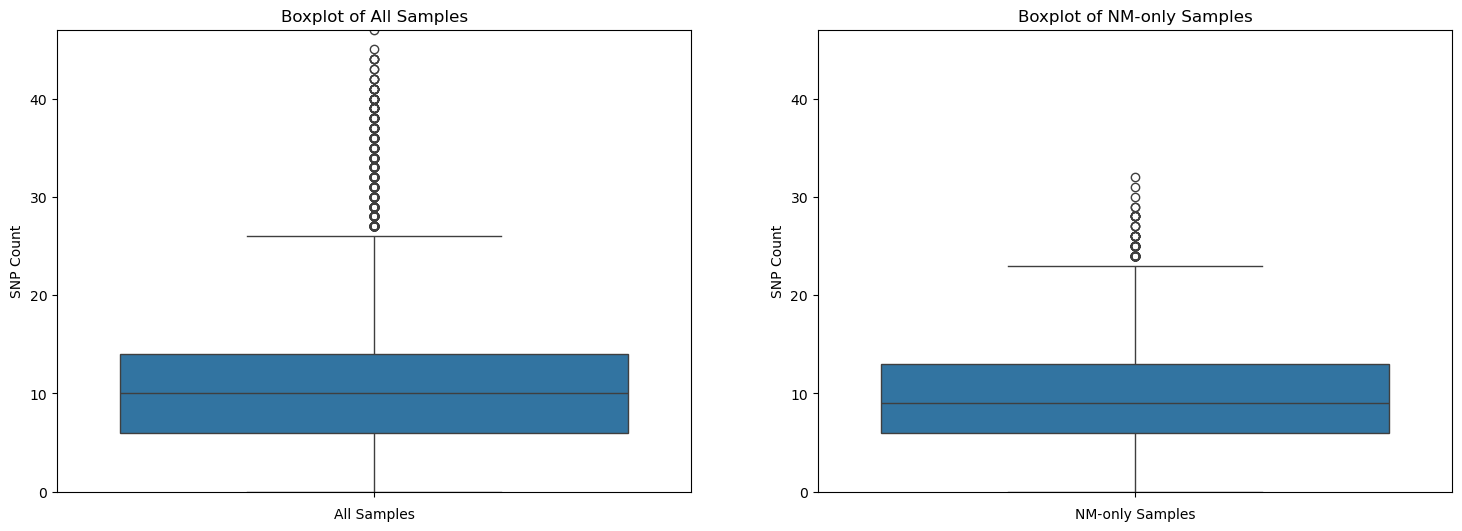

In [5]:
# Box plots for All samples vs NM-only samples
plt.figure(figsize=(18, 6))

# Determine the y-axis limits based on the data
y_min = min(data['SNP_Count'].min(), nm_only_samples['SNP_Count'].min())
y_max = max(data['SNP_Count'].max(), nm_only_samples['SNP_Count'].max())

plt.subplot(1, 2, 1)
sns.boxplot(data['SNP_Count'])
plt.title('Boxplot of All Samples')
plt.xlabel('All Samples')
plt.ylabel('SNP Count')
plt.ylim(y_min, y_max)

plt.subplot(1, 2, 2)
sns.boxplot(nm_only_samples['SNP_Count'])
plt.title('Boxplot of NM-only Samples')
plt.xlabel('NM-only Samples')
plt.ylabel('SNP Count')
plt.ylim(y_min, y_max)



<Figure size 1800x600 with 0 Axes>

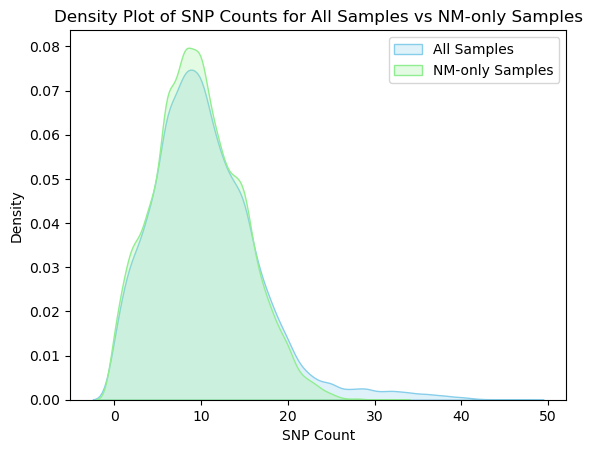

<Figure size 1800x600 with 0 Axes>

In [6]:
# Create density plots for All samples vs NM-only samples
sns.kdeplot(data['SNP_Count'], fill=True, color='skyblue', label='All Samples')
sns.kdeplot(nm_only_samples['SNP_Count'], fill=True, color='lightgreen', label='NM-only Samples')
plt.title('Density Plot of SNP Counts for All Samples vs NM-only Samples')
plt.xlabel('SNP Count')
plt.ylabel('Density')
plt.legend()
plt.figure(figsize=(18, 6))


In [7]:
# Get mean SNP count for each year
mean_snp_counts = nm_only_samples.groupby('Year1')['SNP_Count'].mean()
mean_snp_counts


Year1
2021.0     7.879812
2022.0    10.699117
2023.0    14.120709
Name: SNP_Count, dtype: float64

In [8]:
# Get median SNP count for each year
median_snp_counts = nm_only_samples.groupby('Year1')['SNP_Count'].median()
median_snp_counts

Year1
2021.0     8.0
2022.0    11.0
2023.0    15.0
Name: SNP_Count, dtype: float64

In [60]:
# What are the top 10 highest SNP counts overall and in NM-only samples?
top_10_highest = data.sort_values('SNP_Count', ascending=False).head(10)
top_10_highest_nm = nm_samples.sort_values('SNP_Count', ascending=False).head(10)
top_10_highest

,Sample1,Sample2,SNP_Count
15648,SRR21200972_Human_TX_2021,SRR26901217_Human_NM_2023,47
15641,SRR21200972_Human_TX_2021,SRR26617664_Human_NM_2023,45
15626,SRR21200972_Human_TX_2021,SRR24970938_Human_NM_2023,44
15636,SRR21200972_Human_TX_2021,SRR26399036_Human_NM_2023,44
15639,SRR21200972_Human_TX_2021,SRR26500071_Human_NM_2023,44
15643,SRR21200972_Human_TX_2021,SRR26704352_Human_NM_2023,44
15654,SRR21200972_Human_TX_2021,SRR26969301_Human_NM_2023,43
15652,SRR21200972_Human_TX_2021,SRR26969295_Human_NM_2023,43
15557,SRR21200972_Human_TX_2021,SRR21949088_Human_NM_2022,42
15657,SRR21200972_Human_TX_2021,SRR27046622_Human_NM_2023,42


In [61]:
top_10_highest_nm

,Sample1,Sample2,SNP_Count,Year1,Year2
21593,SRR22363315_Human_NM_2022,SRR26901217_Human_NM_2023,32,2022,2023
24084,SRR26617664_Human_NM_2023,SRR26901217_Human_NM_2023,31,2023,2023
24041,SRR26500071_Human_NM_2023,SRR26901217_Human_NM_2023,30,2023,2023
23969,SRR26399036_Human_NM_2023,SRR26901217_Human_NM_2023,29,2023,2023
24123,SRR26704352_Human_NM_2023,SRR26901217_Human_NM_2023,29,2023,2023
21588,SRR22363315_Human_NM_2022,SRR26704352_Human_NM_2023,28,2022,2023
21586,SRR22363315_Human_NM_2022,SRR26617664_Human_NM_2023,28,2022,2023
23652,SRR24970938_Human_NM_2023,SRR26399036_Human_NM_2023,28,2023,2023
23659,SRR24970938_Human_NM_2023,SRR26704352_Human_NM_2023,28,2023,2023
23657,SRR24970938_Human_NM_2023,SRR26617664_Human_NM_2023,28,2023,2023


In [58]:
# Filter samples where one sample has NHPrimate in name
nh_primate_samples = data[(data['Sample1'].str.contains('NHPrimate')) | (data['Sample2'].str.contains('NHPrimate'))]
nh_primate_samples


,Sample1,Sample2,SNP_Count
26,SRR14118839_Human_LA_2021,SRR16773443_NHPrimate_NM_2021,25
27,SRR14118839_Human_LA_2021,SRR16773444_NHPrimate_NM_2021,24
75,SRR14118839_Human_LA_2021,SRR20082111_NHPrimate_NM_2022,35
216,SRR14118839_Human_LA_2021,SRR27201490_NHPrimate_NM_2023,28
245,SRR14669034_Human_TX_2021,SRR16773443_NHPrimate_NM_2021,4
...,...,...,...
24296,SRR27046622_Human_NM_2023,SRR27201490_NHPrimate_NM_2023,16
24300,SRR27201399_Human_NM_2023,SRR27201490_NHPrimate_NM_2023,13
24303,SRR27201402_Human_NM_2023,SRR27201490_NHPrimate_NM_2023,13
24306,SRR27201490_NHPrimate_NM_2023,SRR10197323_Human_LA_2019,21


In [12]:
# Return top 10 lowest SNP counts for these samples
top_10_lowest_nh_primate = nh_primate_samples.sort_values('SNP_Count').head(10)
top_10_lowest_nh_primate

,Sample1,Sample2,SNP_Count,Location1,Year1,Location2,Year2
3002,SRR15986993_Human_NM_2021,SRR16773444_NHPrimate_NM_2021,0,NM,2021.0,None,NaN
4017,SRR16203529_Human_NM_2021,SRR16773444_NHPrimate_NM_2021,0,NM,2021.0,None,NaN
5997,SRR16773444_NHPrimate_NM_2021,SRR17838860_Human_NM_2022,0,None,NaN,NM,2022.0
5983,SRR16773444_NHPrimate_NM_2021,SRR17179909_Human_NM_2021,0,None,NaN,NM,2021.0
3411,SRR16089430_Human_NM_2021,SRR16773444_NHPrimate_NM_2021,0,NM,2021.0,None,NaN
5202,SRR16634554_Human_NM_2021,SRR16773444_NHPrimate_NM_2021,1,NM,2021.0,None,NaN
6006,SRR16773444_NHPrimate_NM_2021,SRR18925511_Human_NM_2022,1,None,NaN,NM,2022.0
5978,SRR16773444_NHPrimate_NM_2021,SRR17100088_Human_NM_2021,1,None,NaN,NM,2021.0
5996,SRR16773444_NHPrimate_NM_2021,SRR17838858_Human_NM_2022,1,None,NaN,NM,2022.0
4810,SRR16612792_Human_NM_2021,SRR16773443_NHPrimate_NM_2021,1,NM,2021.0,None,NaN


In [13]:
# Get list of samples that have NHPrimate in name
nh_primate_samples_list = data[data['Sample1'].str.contains('NHPrimate')]['Sample1'].unique()
nh_primate_samples_list

array(['SRR16773443_NHPrimate_NM_2021', 'SRR16773444_NHPrimate_NM_2021',
       'SRR20082111_NHPrimate_NM_2022', 'SRR27201490_NHPrimate_NM_2023'],
      dtype=object)

In [14]:
# For each of the nh_primate_samples_list return lowest 5 SNP counts
lowest_5_nh_primate = pd.DataFrame()
for sample in nh_primate_samples_list:
    sample_data = data[(data['Sample1'] == sample) | (data['Sample2'] == sample)]
    lowest_5 = sample_data.sort_values('SNP_Count').head(5)
    lowest_5_nh_primate = pd.concat([lowest_5_nh_primate, lowest_5])

lowest_5_nh_primate

,Sample1,Sample2,SNP_Count,Location1,Year1,Location2,Year2
4216,SRR16562755_Human_NM_2021,SRR16773443_NHPrimate_NM_2021,1,NM,2021.0,None,NaN
5792,SRR16773443_NHPrimate_NM_2021,SRR17179909_Human_NM_2021,1,None,NaN,NM,2021.0
4016,SRR16203529_Human_NM_2021,SRR16773443_NHPrimate_NM_2021,1,NM,2021.0,None,NaN
3815,SRR16203520_Human_NM_2021,SRR16773443_NHPrimate_NM_2021,1,NM,2021.0,None,NaN
3410,SRR16089430_Human_NM_2021,SRR16773443_NHPrimate_NM_2021,1,NM,2021.0,None,NaN
4017,SRR16203529_Human_NM_2021,SRR16773444_NHPrimate_NM_2021,0,NM,2021.0,None,NaN
5997,SRR16773444_NHPrimate_NM_2021,SRR17838860_Human_NM_2022,0,None,NaN,NM,2022.0
3411,SRR16089430_Human_NM_2021,SRR16773444_NHPrimate_NM_2021,0,NM,2021.0,None,NaN
3002,SRR15986993_Human_NM_2021,SRR16773444_NHPrimate_NM_2021,0,NM,2021.0,None,NaN
5983,SRR16773444_NHPrimate_NM_2021,SRR17179909_Human_NM_2021,0,None,NaN,NM,2021.0


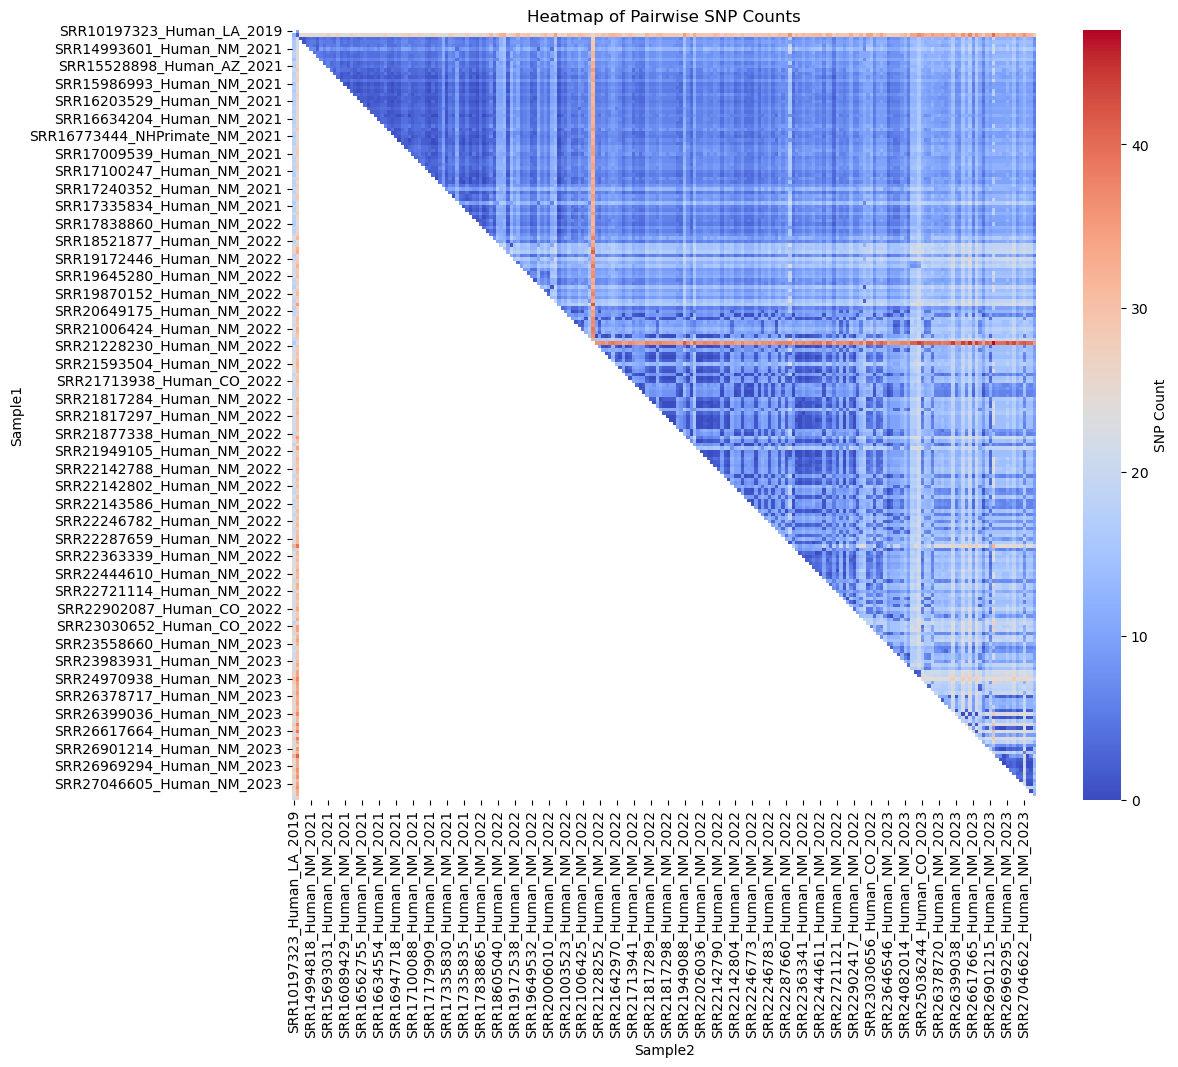

In [15]:
# Create a heatmap of all pairsiwse SNP counts
heatmap_data = data.pivot(index='Sample1', columns='Sample2', values='SNP_Count')
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'SNP Count'})
plt.title('Heatmap of Pairwise SNP Counts')
plt.show()


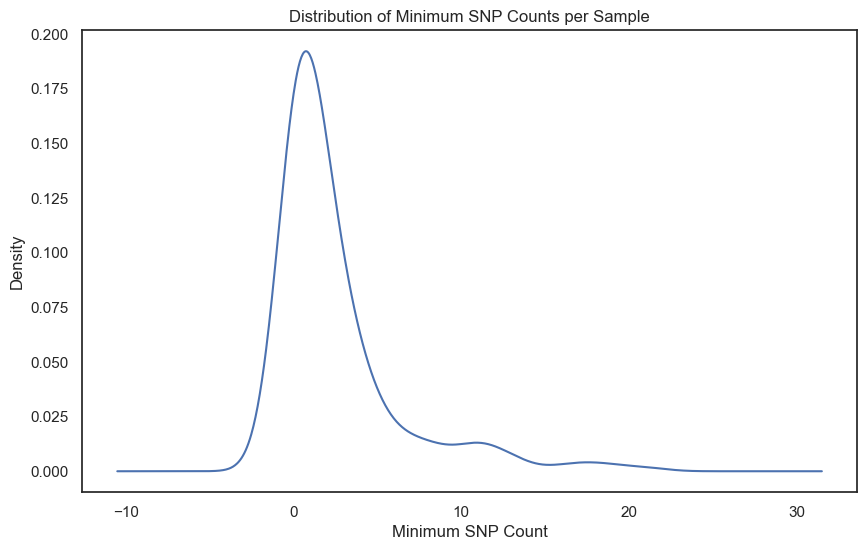

In [62]:
# Plot the distribution of the minimum SNP counts for sample
min_snps = data.groupby('Sample1')['SNP_Count'].min()
plt.figure(figsize=(10, 6))
min_snps.plot.kde()
plt.title('Distribution of Minimum SNP Counts per Sample')
plt.xlabel('Minimum SNP Count')
plt.ylabel('Density')
plt.show()

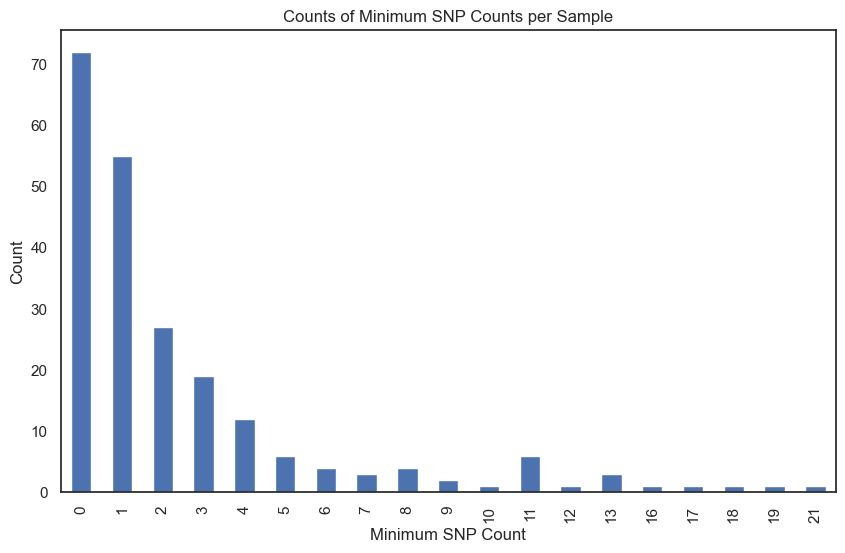

In [63]:
# Plot the counts of the minimum SNP counts for sample
plt.figure(figsize=(10, 6))
min_snps.value_counts().sort_index().plot(kind='bar')
plt.title('Counts of Minimum SNP Counts per Sample')
plt.xlabel('Minimum SNP Count')
plt.ylabel('Count')
plt.show()

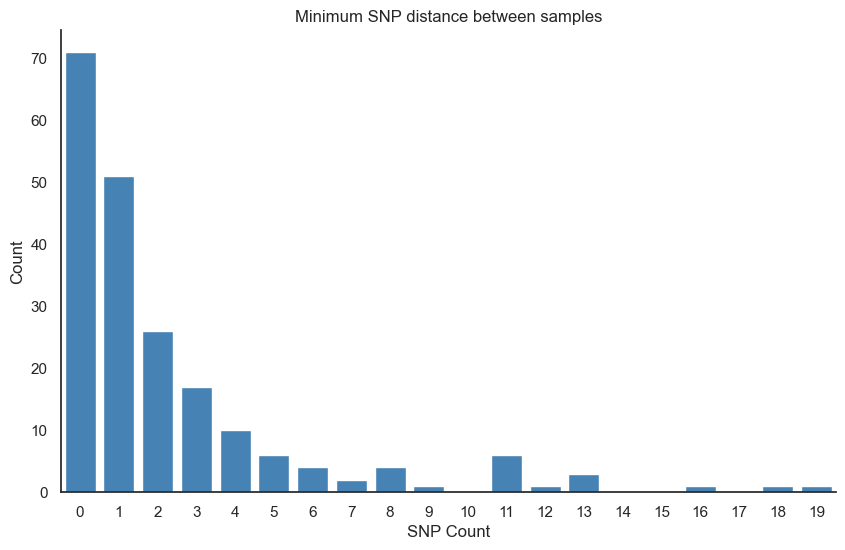

In [75]:
# Get minimum SNP counts for NM samples
min_snps_nm = nm_samples.groupby('Sample1')['SNP_Count'].min()

# Convert to value counts and reindex to include all values 0-21
counts = min_snps_nm.value_counts().reindex(range(22), fill_value=0)

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot with continuous x-axis
plt.bar(counts.index, counts.values, color='steelblue')

# Customize plot
plt.title('Minimum SNP distance between samples')
plt.xlabel('SNP Count')
plt.ylabel('Count')
plt.xlim(-0.5, 19.5)
plt.xticks(range(0, 20))

# Remove top and right spines
sns.despine()

plt.show()

In [78]:
# How many samples have a minimum SNP count below or equal to 10?
below_10 = counts[:11].sum()
below_10

# What percentage of samples have a minimum SNP count below or equal to 10?
total_samples = counts.sum()
percentage_below_10 = (below_10 / total_samples) * 100
percentage_below_10

print (below_10, total_samples, percentage_below_10)

192 205 93.65853658536587
